In [1]:
#자동차 연비 예측 분석  ==>  회귀분석
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd

data_df = pd.read_csv('auto-mpg.csv',header=0,engine='python')

In [2]:
data_df.shape

(398, 9)

In [3]:
#'car_name','origin','horsepower' 제거
data_df=data_df.drop(['car_name','origin','horsepower'],axis=1)

In [4]:
data_df.shape

(398, 6)

In [5]:
data_df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [6]:
# X,Y 분할하기
Y = data_df['mpg']
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [7]:
X = data_df.drop(['mpg'],axis=1)
X

,cylinders,displacement,weight,acceleration,model_year
0,8,307.0,3504,12.0,70
1,8,350.0,3693,11.5,70
2,8,318.0,3436,11.0,70
3,8,304.0,3433,12.0,70
4,8,302.0,3449,10.5,70
...,...,...,...,...,...
393,4,140.0,2790,15.6,82
394,4,97.0,2130,24.6,82
395,4,135.0,2295,11.6,82
396,4,120.0,2625,18.6,82


In [8]:
#훈련용 데이터와 평가용 데이터로 분할
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
X_train

,cylinders,displacement,weight,acceleration,model_year
230,8,350.0,4165,11.4,77
357,4,119.0,2615,14.8,81
140,8,304.0,4257,15.5,74
22,4,104.0,2375,17.5,70
250,8,318.0,3735,13.2,78
...,...,...,...,...,...
323,4,156.0,2800,14.4,80
192,6,250.0,3353,14.5,76
117,4,68.0,1867,19.5,73
47,6,250.0,3282,15.0,71


In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#선형회귀분석 : 모델 훈련
lr.fit(X_train,Y_train)

LinearRegression()

In [10]:
#평가 데이터에 대해 예측 수행
Y_predict = lr.predict(X_test)

In [11]:
Y_predict

array([12.68813886, 24.89235692, 11.77966226, 20.713484  , 17.59974974,
       28.70463932, 31.8246109 , 24.79459783, 13.3797074 , 28.03809202,
       33.95480562, 32.517138  , 21.28643713, 26.32547953, 16.29305741,
       32.16905355, 30.04731897, 29.90617451, 17.78110613, 30.69577551,
       15.33574367, 25.60299563, 25.4723533 , 20.04730443, 30.70244174,
       26.79576507, 32.20306918, 31.95533215, 30.42830733, 18.19432511,
       21.19981862, 29.62938625, 20.86352443, 30.82503708, 24.35511863,
       23.81034331, 21.45816755, 16.77101118, 31.95362794,  8.06590693,
        9.60178767, 13.8699291 , 27.26165312, 29.00102026, 29.52364892,
       22.58571769, 23.20233694, 13.80533693, 23.86039376, 28.12535283,
       31.40954528, 26.70297991, 15.34381889, 25.01897062, 14.71481708,
        9.53883961, 19.64272577, 26.82491432, 31.30917854, 14.99268593,
       20.64360774, 25.57610711, 22.45200894, 19.72033566, 10.7918702 ,
       11.42513414,  9.7023088 , 19.68724093, 24.98227534,  9.68

In [12]:
#회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

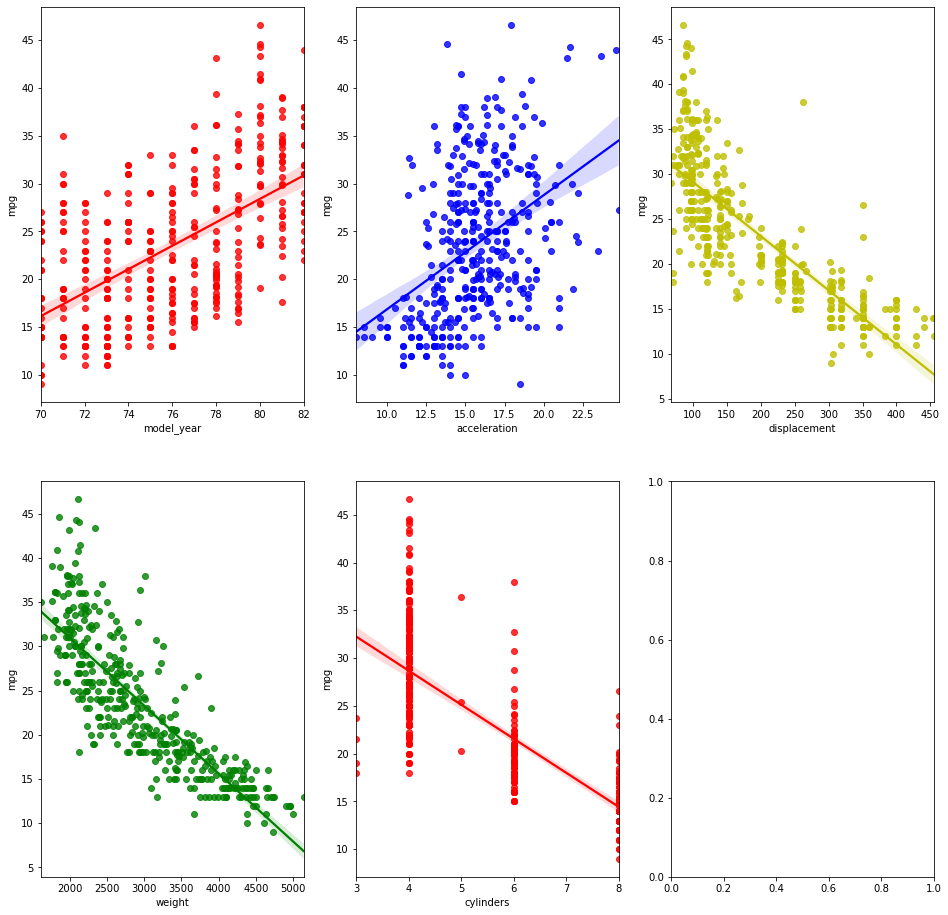

In [14]:
fig,axs = plt.subplots(figsize =(16,16),ncols=3,nrows=2 )
x_features=['model_year','acceleration','displacement','weight','cylinders']
plot_color = ['r','b','y','g','r']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature,y='mpg',data=data_df,ax=axs[row][col],color=plot_color[i])

In [15]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(Y_test,Y_predict)
mse

12.278239036609508

In [16]:
rmse = np.sqrt(mse)
rmse

3.5040318258556824

In [17]:
print('MSE:{0:.3f},RMSE:{1:.3f}'.format(mse,rmse))

MSE:12.278,RMSE:3.504


In [18]:
r2 = r2_score(Y_test,Y_predict)
r2

0.8078579451877164

In [19]:
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test,Y_predict)))

R^2(Variance score) : 0.808


In [20]:
print('Y절편 값',np.round(lr.intercept_,2))
print('회귀계수 값',np.round(lr.coef_,2))

Y절편 값 -17.55
회귀계수 값 [-0.14  0.01 -0.01  0.2   0.76]


In [23]:
coef = pd.Series(data=np.round(lr.coef_,2),index=X.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

In [30]:
print('연비를 예측하고 싶은 차의 정보를 입력하세요')
cylinders_1=int(input('cylinders :'))
model_year_1=int(input('model_year :'))
displacement_1=int(input('displacement :'))
weight_1=int(input('weight :'))
acceleration_1=int(input('acceleration :'))

연비를 예측하고 싶은 차의 정보를 입력하세요
cylinders :8
model_year :99
displacement :350
weight :3200
acceleration :22


In [31]:
mpg_predict =lr.predict([[cylinders_1,displacement_1,weight_1,acceleration_1,model_year_1]])

In [32]:
mpg_predict

array([41.31991868])

In [33]:
print('이 자동차의 예상 연비(mpg)는 %.2f 입니다.'%mpg_predict)

이 자동차의 예상 연비(mpg)는 41.32 입니다.
